## Análisis de datos - Clase 3

### Manejo de outliers

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer

In [2]:
# Cargar el dataset de Titanic
df = sns.load_dataset("titanic")

# Seleccionar variables numéricas relevantes
df = df[['age', 'fare']].dropna()
df

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
885,39.0,29.1250
886,27.0,13.0000
887,19.0,30.0000
889,26.0,30.0000


In [3]:
df.describe()

,age,fare
count,714.000000,714.000000
mean,29.699118,34.694514
std,14.526497,52.918930
min,0.420000,0.000000
25%,20.125000,8.050000
50%,28.000000,15.741700
75%,38.000000,33.375000
max,80.000000,512.329200


#### Métodos estadísticos para detectar outliers

In [4]:
# Métodos estadísticos para detectar outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outliers_iqr = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
outliers_iqr

,age,fare
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
885,False,False
886,False,False
887,False,False
889,False,False


#### Método basado en desviación estándar para detectar outliers

In [5]:
# Método basado en desviación estándar
mean = df.mean()
std = df.std()
outliers_std = (df < (mean - 3 * std)) | (df > (mean + 3 * std))
outliers_std

,age,fare
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
885,False,False
886,False,False
887,False,False
889,False,False


#### Visualización

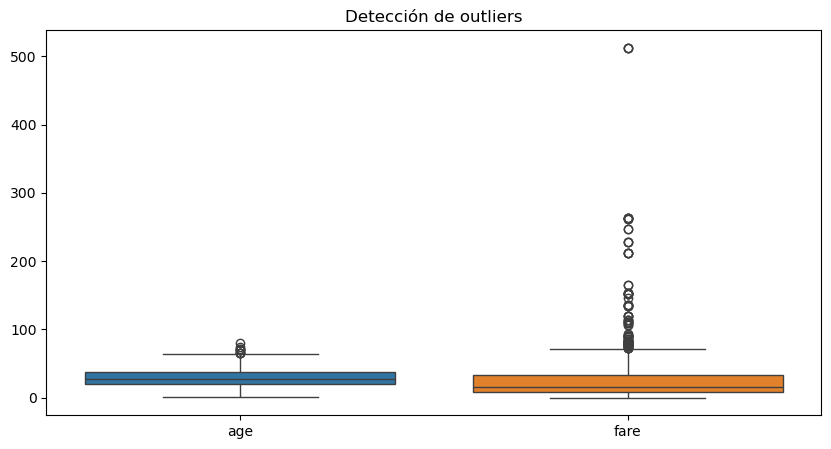

In [6]:
# Visualización de outliers con boxplots
plt.figure(figsize=(10, 5))
sns.boxplot(data=df)
plt.title("Detección de outliers")
plt.show()

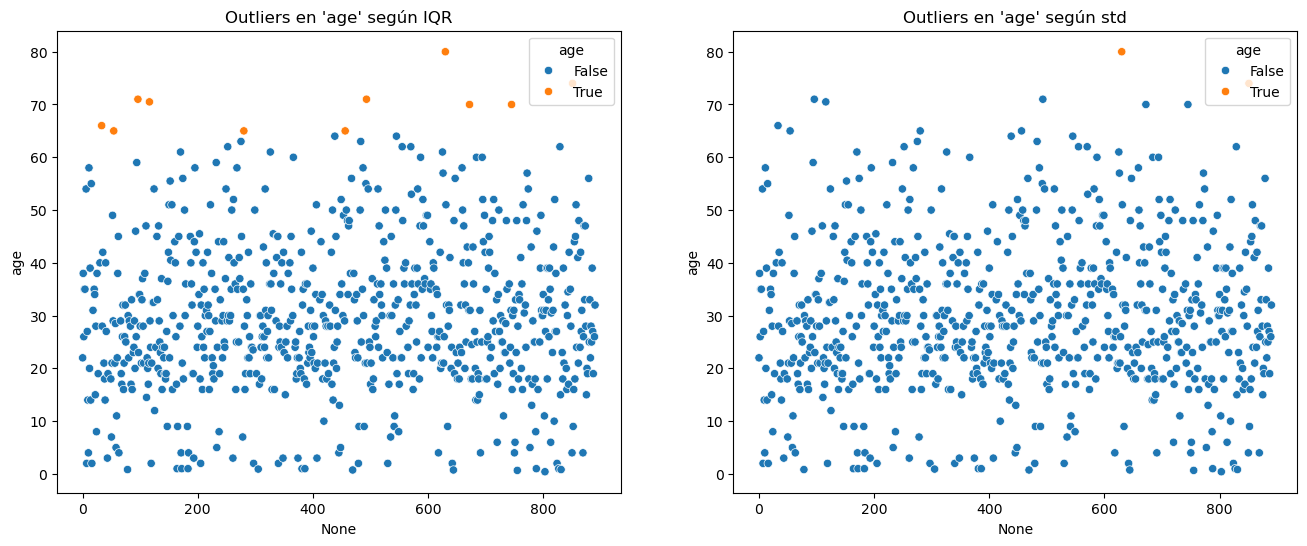

In [7]:
# Visualización con scatterplot
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.scatterplot(x=df.index, y=df['age'], hue=outliers_iqr['age'], ax=ax[0])
ax[0].set_title("Outliers en 'age' según IQR")
sns.scatterplot(x=df.index, y=df['age'], hue=outliers_std['age'], ax=ax[1])
ax[1].set_title("Outliers en 'age' según std")
plt.show()

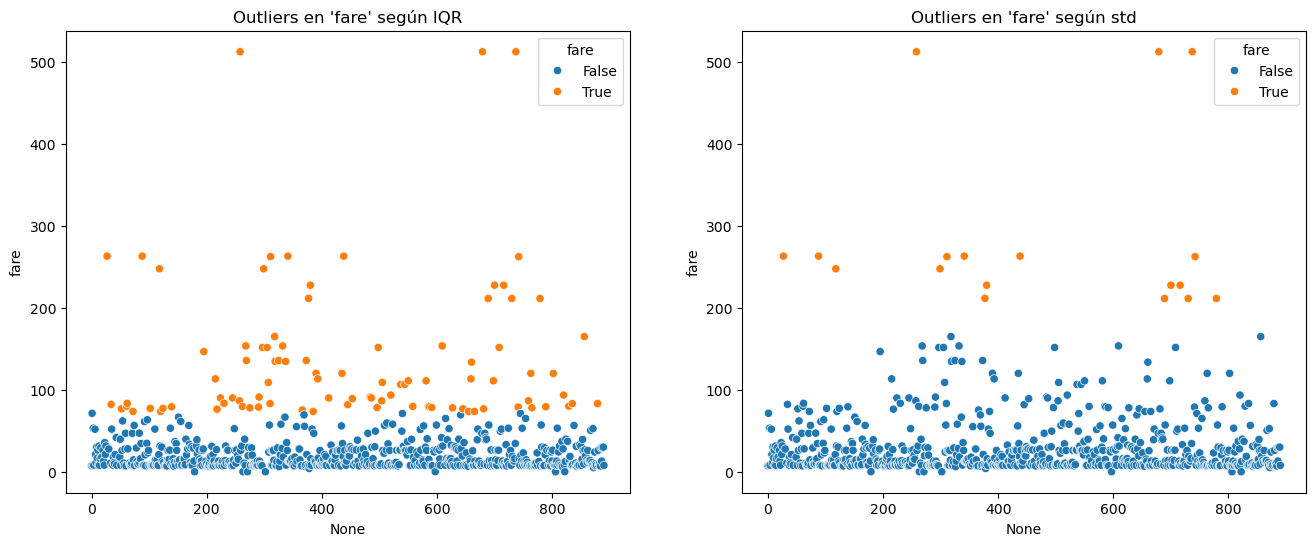

In [8]:
# Visualización con scatterplot
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.scatterplot(x=df.index, y=df['fare'], hue=outliers_iqr['fare'], ax=ax[0])
ax[0].set_title("Outliers en 'fare' según IQR")
sns.scatterplot(x=df.index, y=df['fare'], hue=outliers_std['fare'], ax=ax[1])
ax[1].set_title("Outliers en 'fare' según std")
plt.show()

### Estrategias de eliminación y tratamiento de outliers


#### 1. Eliminación de outliers

In [9]:
# Datos con outliers detectados
outliers_detected = df[outliers_iqr.any(axis=1)]
outliers_detected

,age,fare
27,19.0,263.0000
33,66.0,10.5000
34,28.0,82.1708
52,49.0,76.7292
54,65.0,61.9792
...,...,...
829,62.0,80.0000
835,39.0,83.1583
851,74.0,7.7750
856,45.0,164.8667


In [10]:
# 1. Eliminación de outliers
df_no_outliers = df[~outliers_iqr.any(axis=1)]
df_no_outliers.describe()

,age,fare
count,609.000000,609.000000
mean,28.275452,19.104857
std,13.416418,14.473114
min,0.420000,0.000000
25%,20.000000,7.925000
50%,28.000000,13.000000
75%,36.000000,26.250000
max,64.000000,71.283300


#### 2. Transformación logarítmica para reducir impacto de outliers

In [11]:
# 2. Transformación logarítmica para reducir impacto de outliers
df_transformed = df.copy()
df_transformed['fare'] = np.log1p(df_transformed['fare'])
df_transformed.describe()

,age,fare
count,714.000000,714.000000
mean,29.699118,3.042013
std,14.526497,0.952459
min,0.420000,0.000000
25%,20.125000,2.202765
50%,28.000000,2.817903
75%,38.000000,3.537310
max,80.000000,6.240917


#### 3. Imputación por mediana

In [12]:
# 3. Imputación por mediana
df_imputed = df.copy()
df_imputed.loc[outliers_iqr.any(axis=1), 'fare'] = df['fare'].median()
df_imputed.describe()

,age,fare
count,714.000000,714.000000
mean,29.699118,18.610275
std,14.526497,13.418047
min,0.420000,0.000000
25%,20.125000,8.050000
50%,28.000000,15.741700
75%,38.000000,26.000000
max,80.000000,71.283300


#### 4. Imputación con KNN

In [13]:
# 4. Imputación con KNN

imputer = KNNImputer(n_neighbors=5)
df_nan = df.copy()
df_nan.loc[outliers_iqr.any(axis=1)] = np.nan  # Marcar outliers como NaN
df_knn_imputed = pd.DataFrame(imputer.fit_transform(df_nan), columns=df.columns)
df_knn_imputed.describe()

,age,fare
count,714.000000,714.000000
mean,28.275452,19.104857
std,12.389210,13.365001
min,0.420000,0.000000
25%,21.000000,8.050000
50%,28.275452,15.850000
75%,34.000000,26.000000
max,64.000000,71.283300


#### Segmentación
Crear una categoría para los Outliers

In [14]:
# 5. Segmentación: Crear una categoría de "outlier" en 'fare'
df_segmented = df.copy()
df_segmented['fare_outlier'] = outliers_iqr['fare'].apply(lambda x: 'Outlier' if x else 'Normal')
df_segmented

,age,fare,fare_outlier
0,22.0,7.2500,Normal
1,38.0,71.2833,Normal
2,26.0,7.9250,Normal
3,35.0,53.1000,Normal
4,35.0,8.0500,Normal
...,...,...,...
885,39.0,29.1250,Normal
886,27.0,13.0000,Normal
887,19.0,30.0000,Normal
889,26.0,30.0000,Normal
